In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import proplot as plot
from xtimeutil import Axis, Remapper
from xtimeutil.testing import create_dataset
import nc_time_axis
import matplotlib.pyplot as plt

## Create Test Data: Freq: monthly, 3 years worth of data

In [3]:
calendar = 'noleap'
ds = create_dataset(var_const=False, use_cftime=True, calendar=calendar)
ds['var_ex'] = ds['var_ex'].where(ds.var_ex < 0.9)
da = ds.var_ex
ds

<xarray.Dataset>
Dimensions:      (d2: 2, lat: 2, lon: 2, time: 36)
Coordinates:
  * time         (time) object 1980-01-16 12:00:00 ... 1982-12-16 12:00:00
  * lat          (lat) float32 20.0 30.0
  * lon          (lon) float32 100.0 120.0
Dimensions without coordinates: d2
Data variables:
    var_ex       (time, lat, lon) float32 0.13245104 0.19494216 ... 0.09895891
    time_bounds  (time, d2) object ...

## monthly --> monthly

In [4]:
freq = 'MS'
remapper = Remapper(ds, freq=freq)
remapper.weights

<36x36 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [5]:
x_resample = da.resample(time=freq).mean()

/Users/abanihi/opt/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
data = remapper.average(da)
data.coords

/Users/abanihi/devel/ncar/xtime/xtimeutil/remapper.py:189: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_sum_effective_weights = np.reciprocal(self.weights * non_nan_mask)
/Users/abanihi/devel/ncar/xtime/xtimeutil/remapper.py:190: RuntimeWarning: invalid value encountered in multiply
  output_data = np.multiply(self.weights * input_data, inverse_sum_effective_weights)


Coordinates:
  * time     (time) object 1980-01-16 12:00:00 ... 1982-12-16 12:00:00
  * lat      (lat) float32 20.0 30.0
  * lon      (lon) float32 100.0 120.0

In [7]:
data.shape

(36, 2, 2)

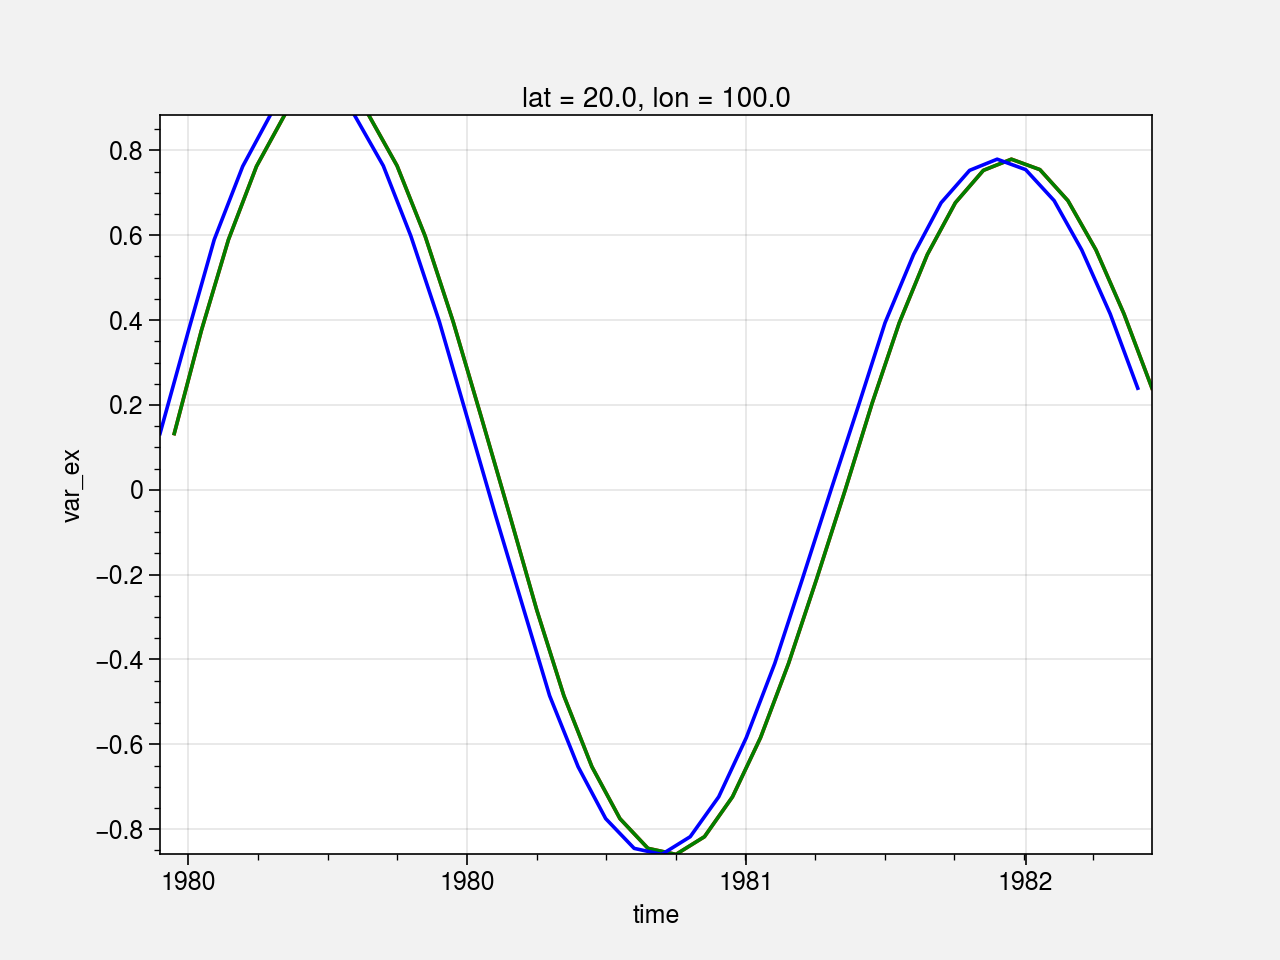

In [8]:
fig, axes = plt.subplots(ncols=1)
da.isel(lat=0, lon=0).plot(ax=axes, color='red')
data.isel(lat=0, lon=0).plot(ax=axes, color='green')
x_resample.isel(lat=0, lon=0).plot(ax=axes, color='blue');

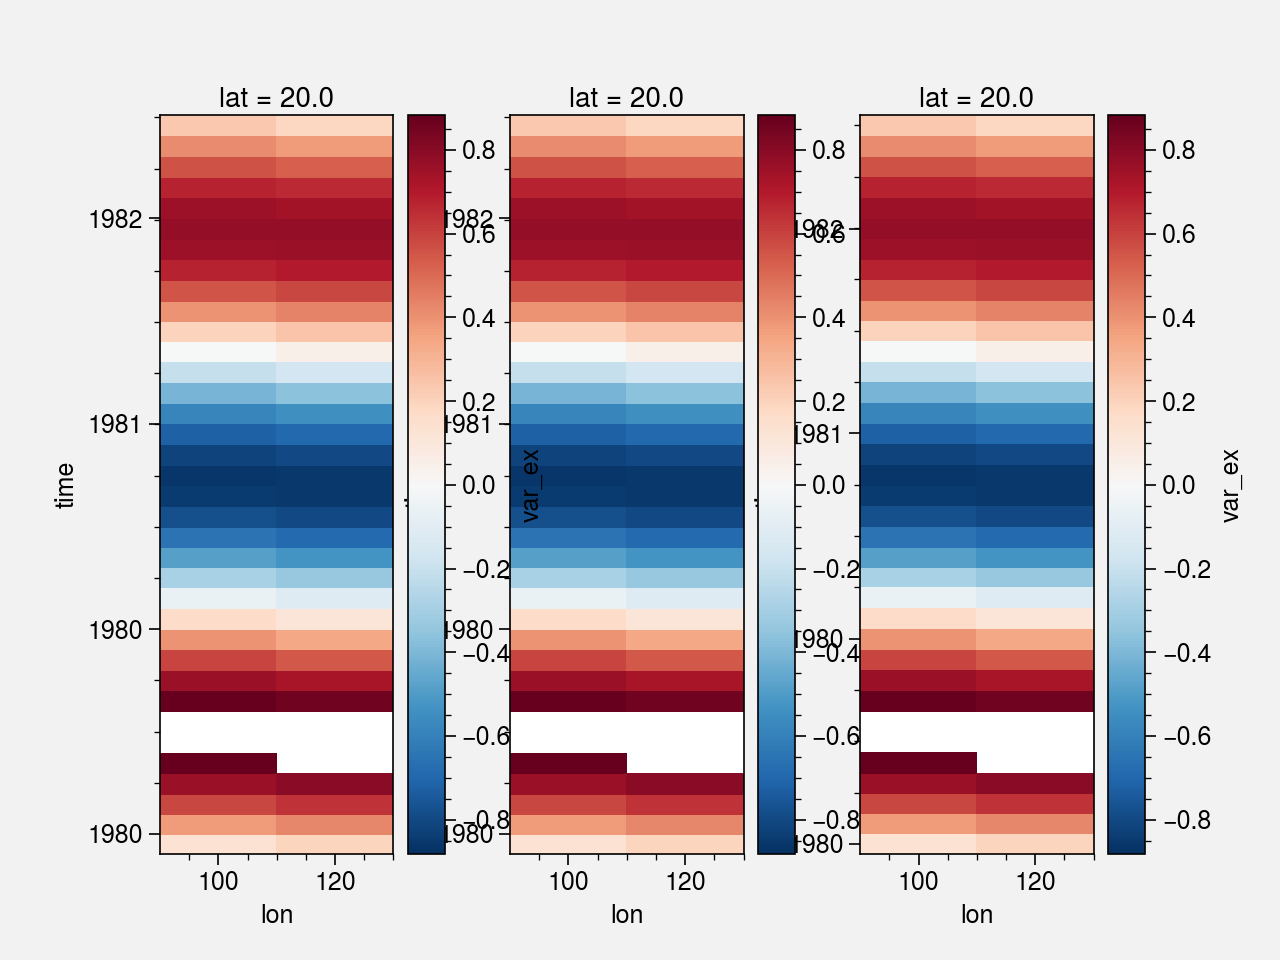

In [9]:
fig, axes = plt.subplots(ncols=3)
da.isel(lat=0).plot(ax=axes[0])
data.isel(lat=0).plot(ax=axes[1])
x_resample.isel(lat=0).plot(ax=axes[2])

## monthly --> 7 Days

In [10]:
freq = '7D'
remapper = Remapper(ds, freq=freq)
remapper.weights

<153x36 sparse matrix of type '<class 'numpy.float64'>'
	with 302 stored elements in Compressed Sparse Row format>

In [11]:
data = remapper.average(da)
data.coords

/Users/abanihi/devel/ncar/xtime/xtimeutil/remapper.py:189: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_sum_effective_weights = np.reciprocal(self.weights * non_nan_mask)
/Users/abanihi/devel/ncar/xtime/xtimeutil/remapper.py:190: RuntimeWarning: invalid value encountered in multiply
  output_data = np.multiply(self.weights * input_data, inverse_sum_effective_weights)


Coordinates:
  * time     (time) object 1980-01-16 12:00:00 ... 1982-12-16 12:00:00
  * lat      (lat) float32 20.0 30.0
  * lon      (lon) float32 100.0 120.0

In [12]:
data.shape

(153, 2, 2)

In [13]:
x_resample = da.resample(time=freq).mean()

/Users/abanihi/opt/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


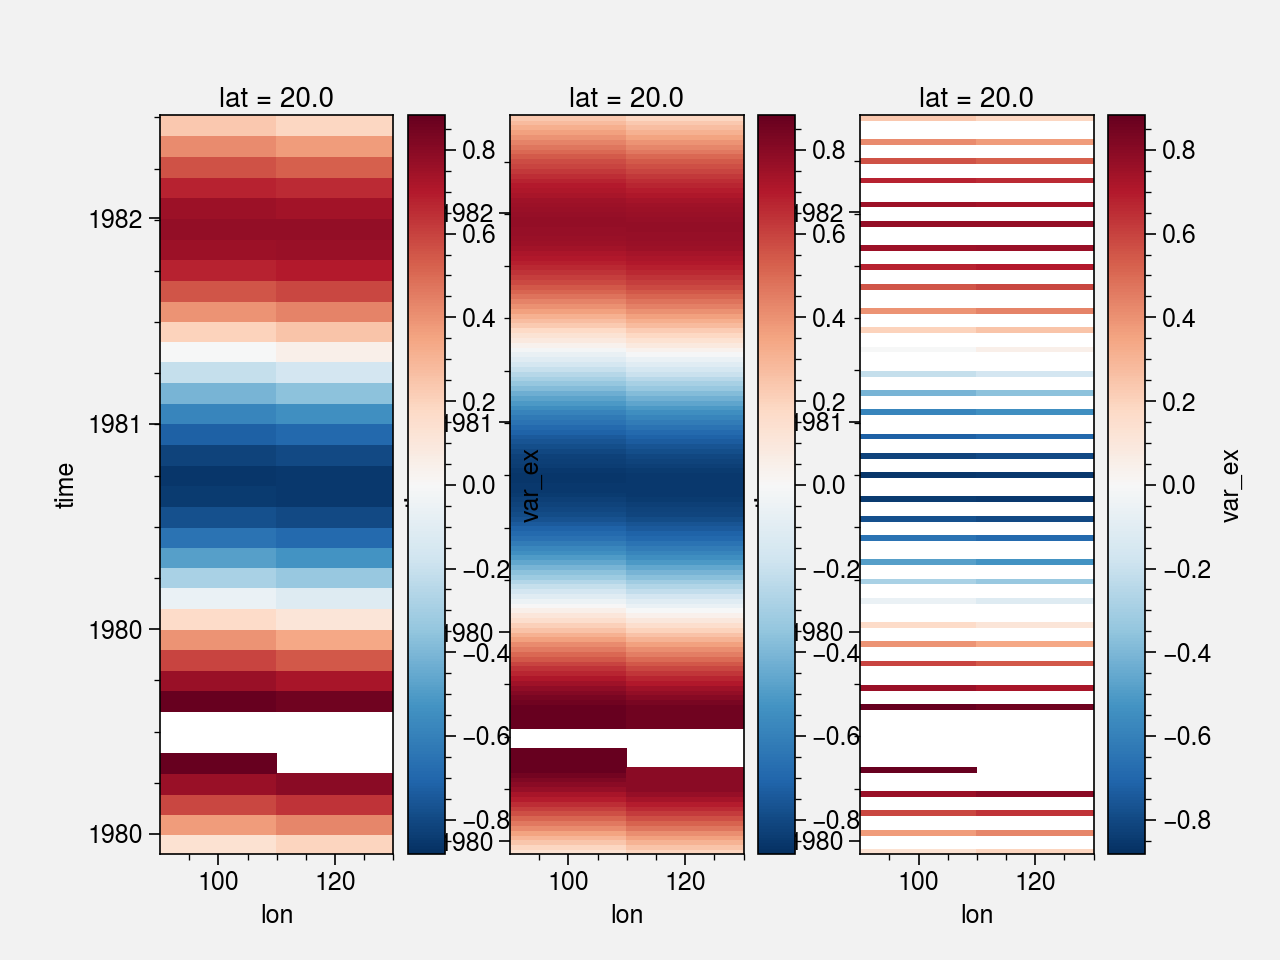

In [14]:
fig, axes = plt.subplots(ncols=3)
da.isel(lat=0).plot(ax=axes[0])
data.isel(lat=0).plot(ax=axes[1])
x_resample.isel(lat=0).plot(ax=axes[2])

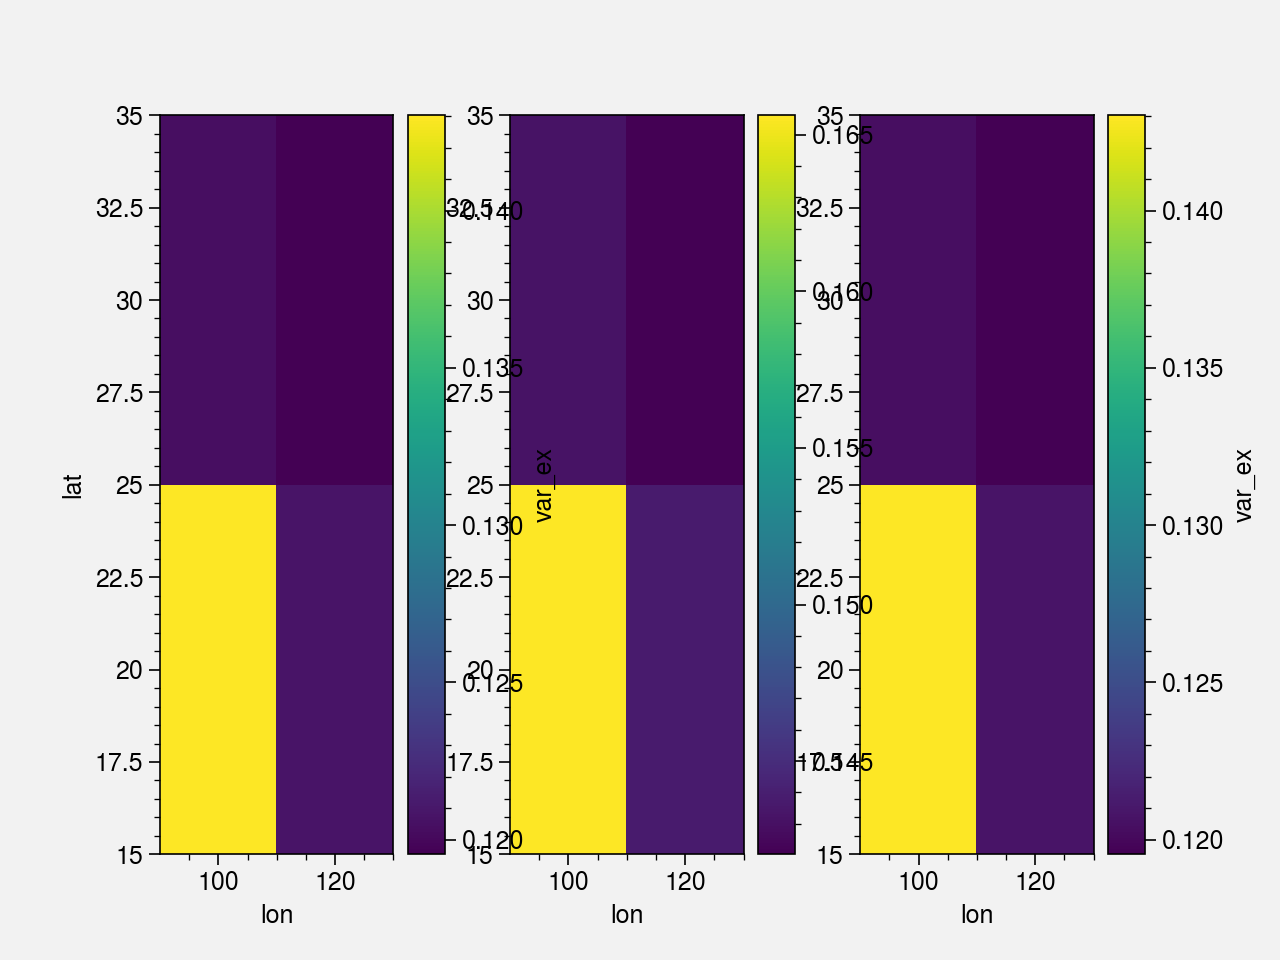

In [15]:
fig, axes = plt.subplots(ncols=3)
da.mean(dim='time').plot(ax=axes[0])
data.mean(dim='time').plot(ax=axes[1])
x_resample.mean(dim='time').plot(ax=axes[2])

## Pandas Datetime

In [16]:
ds = create_dataset(var_const=False, use_cftime=False, calendar='standard')
ds['var_ex'] = ds['var_ex'].where(ds.var_ex < 0.9)
da = ds.var_ex
ds

<xarray.Dataset>
Dimensions:      (d2: 2, lat: 2, lon: 2, time: 36)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-16T12:00:00 ... 1982-12-15T12:00:00
  * lat          (lat) float32 20.0 30.0
  * lon          (lon) float32 100.0 120.0
Dimensions without coordinates: d2
Data variables:
    var_ex       (time, lat, lon) float32 0.13245104 0.19494216 ... 0.09895891
    time_bounds  (time, d2) datetime64[ns] ...

In [17]:
freq = 'Q'
remapper = Remapper(ds, freq=freq)
remapper.weights

<12x36 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [18]:
data = remapper.average(da)
x_resample = da.resample(time=freq).mean()
data.time

<xarray.DataArray 'time' (time: 12)>
array(['1980-03-31T00:00:00.000000000', '1980-06-30T00:00:00.000000000',
       '1980-09-30T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-03-31T00:00:00.000000000', '1981-06-30T00:00:00.000000000',
       '1981-09-30T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-03-31T00:00:00.000000000', '1982-06-30T00:00:00.000000000',
       '1982-09-30T00:00:00.000000000', '1982-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-03-31 1980-06-30 ... 1982-12-31

In [19]:
x_resample.time

<xarray.DataArray 'time' (time: 12)>
array(['1980-03-31T00:00:00.000000000', '1980-06-30T00:00:00.000000000',
       '1980-09-30T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-03-31T00:00:00.000000000', '1981-06-30T00:00:00.000000000',
       '1981-09-30T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-03-31T00:00:00.000000000', '1982-06-30T00:00:00.000000000',
       '1982-09-30T00:00:00.000000000', '1982-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-03-31 1980-06-30 ... 1982-12-31

In [20]:
remapper.decoded_time_bounds_out.min(dim='d2')

<xarray.DataArray (time: 12)>
array(['1980-03-31T00:00:00.000000000', '1980-06-30T00:00:00.000000000',
       '1980-09-30T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-03-31T00:00:00.000000000', '1981-06-30T00:00:00.000000000',
       '1981-09-30T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-03-31T00:00:00.000000000', '1982-06-30T00:00:00.000000000',
       '1982-09-30T00:00:00.000000000', '1982-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Dimensions without coordinates: time

In [21]:
freq = 'MS'
remapper = Remapper(ds, freq=freq)
remapper.weights

<35x36 sparse matrix of type '<class 'numpy.float64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [22]:
remapper.decoded_time_bounds_out.min(dim='d2')

<xarray.DataArray (time: 35)>
array(['1980-01-01T00:00:00.000000000', '1980-02-01T00:00:00.000000000',
       '1980-03-01T00:00:00.000000000', '1980-04-01T00:00:00.000000000',
       '1980-05-01T00:00:00.000000000', '1980-06-01T00:00:00.000000000',
       '1980-07-01T00:00:00.000000000', '1980-08-01T00:00:00.000000000',
       '1980-09-01T00:00:00.000000000', '1980-10-01T00:00:00.000000000',
       '1980-11-01T00:00:00.000000000', '1980-12-01T00:00:00.000000000',
       '1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', '1981-04-01T00:00:00.000000000',
       '1981-05-01T00:00:00.000000000', '1981-06-01T00:00:00.000000000',
       '1981-07-01T00:00:00.000000000', '1981-08-01T00:00:00.000000000',
       '1981-09-01T00:00:00.000000000', '1981-10-01T00:00:00.000000000',
       '1981-11-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1982-02-01T00:00:00.000000000',
       '1982-03-01T00:00:00.000000000', '1982-04-01T00:00:00.000000000',
       '1982-05-01T00:00:00.000000000', '1982-06-01T00:00:00.000000000',
       '1982-07-01T00:00:00.000000000', '1982-08-01T00:00:00.000000000',
       '1982-09-01T00:00:00.000000000', '1982-10-01T00:00:00.000000000',
       '1982-11-01T00:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: time